In [1]:
import os
import sys
import dlib
import json
import imgaug
import argparse
import cv2 as cv
from math import pi
import pandas as pd
import numpy as np
import skimage.draw
from fnmatch import fnmatch
from itertools import permutations
from PIL import Image, ImageDraw
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath("C:\\Users\\nidhimh\\Documents\\Mask_RCNN-master")

In [3]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config

# Import FDDB config
sys.path.append(os.path.join(ROOT_DIR, "samples/fddb/"))  # To find local version
import fddb 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
FDDB_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_fddb_0002.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(FDDB_MODEL_PATH):
    utils.download_trained_weights(FDDB_MODEL_PATH)


C:\Users\nidhimh\Anaconda3\envs\Tensor150\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nidhimh\Anaconda3\envs\Tensor150\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nidhimh\Anaconda3\envs\Tensor150\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nidhimh\Anaconda3\envs\Tensor150\lib\site-pack


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
class InferenceConfig(fddb.FDDBConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on FDDB
model.load_weights(FDDB_MODEL_PATH, by_name=True)

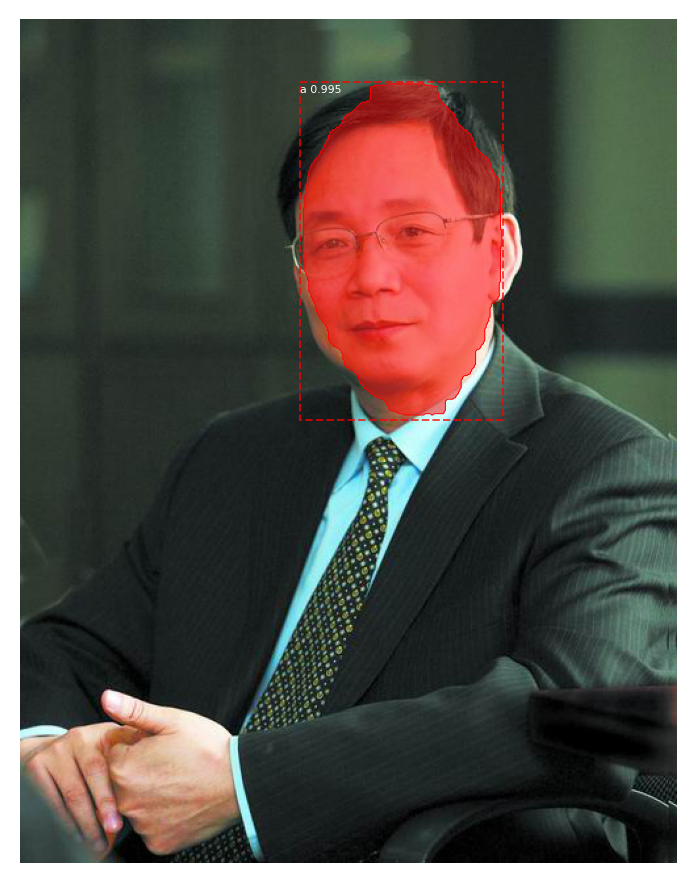

In [6]:
image = skimage.io.imread("C:\\Users\\nidhimh\\Downloads\\0013\\104a.jpg")
r = model.detect([image], verbose=0)[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 'face', scores=r['scores'])

In [7]:
# r['rois'] = y1, x1, y2, x2
y1 = r['rois'][0][0]
x1 = r['rois'][0][1]
y2 = r['rois'][0][2]
x2 = r['rois'][0][3]

In [8]:
face_width = x2-x1
face_height = y2-y1

In [9]:
height = np.size(image, 0)
width = np.size(image, 1)

In [10]:
# Face has to cover approximately 60% of the whole image
# Most passport photos do not require face to be vertically centered
facePercent = face_height/height

In [11]:
facePercent

0.40031152647975077

In [12]:
left = x1
right = width - x2

In [13]:
# horizontally centered

if abs(left-right) < 0.15*max(left, right):
    print('horizontally centered')
else:
    print('not horizontally centered')

not horizontally centered


In [14]:
p = "shape_predictor_68_face_landmarks.dat"

In [15]:
predictor = dlib.shape_predictor(p)

In [16]:
img = cv.imread('C:\\Users\\nidhimh\\Downloads\\0013\\104a.jpg')

In [17]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [18]:
# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()
# Detecting faces in the grayscale image
faces = detector(gray)
print(faces)

rectangles[[(194, 112) (344, 261)]]


In [19]:
# Creating a for loop in order to extract
# specific coordinates (x1,x2,y1,y2)
for face in faces:
  x1=face.left()
  y1=face.top()
  x2=face.right()
  y2=face.bottom()

In [20]:
p = "shape_predictor_68_face_landmarks.dat"
# Initialize dlib's shape predictor
predictor = dlib.shape_predictor(p)
# Get the shape using the predictor
landmarks=predictor(gray, face)

In [24]:
for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    cv.circle(img, (x, y), 1, (0, 0, 255), -1)
cv.imshow('what', img)
cv.waitKey(0)
cv.destroyAllWindows()